In [1]:
from scipy.ndimage import imread
import numpy as np
from matplotlib import pyplot as plt
import sys
import pandas as pd
sys.path.insert(0, '/Users/choldgraf/github/mne-python/')
import mne
from mne.viz.utils import ClickableImage
from mne.channels.layout import generate_2d_layout

In [2]:
plt.rcParams['image.cmap'] = 'gray'

In [36]:
im_path = '/Users/choldgraf/github/mne-python/mne/data/image/mni_brain.gif'
layout_path = '/Users/choldgraf/github/mne-python/mne/data/image/custom_layout.lay'

In [37]:
im = imread(im_path)

## Display image, then click/store positions

In [39]:
# Make sure that inline plotting is off before clicking
%matplotlib qt
click = ClickableImage(im)

In [40]:
%matplotlib inline

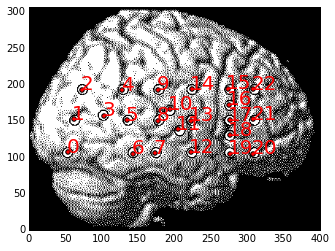

[(54.032258064516128, 106.33072916666667), (62.096774193548384, 151.90104166666669), (73.387096774193552, 192.67447916666669), (103.22580645161288, 156.69791666666669), (128.22580645161287, 191.875), (135.48387096774195, 151.1015625), (143.54838709677421, 104.73177083333333), (174.19354838709677, 105.53125000000001), (178.22580645161287, 150.30208333333331), (178.22580645161287, 192.67447916666669), (193.54838709677421, 165.4921875), (205.64516129032256, 138.30989583333331), (223.38709677419354, 106.33072916666667), (223.38709677419354, 150.30208333333331), (224.19354838709677, 193.47395833333331), (274.19354838709677, 194.2734375), (275.80645161290323, 171.88802083333331), (276.61290322580646, 151.1015625), (276.61290322580646, 130.31510416666669), (276.61290322580646, 104.73177083333333), (308.87096774193549, 104.73177083333333), (308.87096774193549, 151.90104166666669), (308.87096774193549, 193.47395833333331)]


In [41]:
# The click coordinates are stored as a list of tuples
click.plot_clicks()
coords = click.coords
print coords

##Show results

In [42]:
# Generate a layout from our clicks and normalize by the image
# lt = generate_2d_layout(np.vstack(coords), bg_image=im) 
# lt.save(layout_path + 'custom_layout.lay')  # To save if we want

# Or if we've already got the layout, load it
lt = mne.channels.read_layout(layout_path)

In [43]:
# Create some fake data
nchans = len(coords)
nepochs = 50
sr = 1000
nsec = 5
events = np.arange(nepochs).reshape([-1, 1])
events = np.hstack([events, np.zeros([nepochs, 2])])
data = np.random.randn(nepochs, nchans, sr * nsec)
info = mne.create_info(nchans, sr, ch_types='eeg')
epochs = mne.EpochsArray(data, info, events)

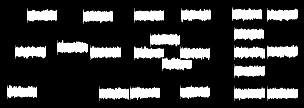

In [44]:
# Using the native plot_topo function
f = mne.viz.plot_topo(epochs.average(), layout=lt)

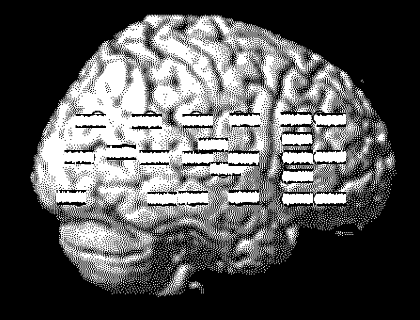

In [45]:
# Now with the image plotted in the background
f = mne.viz.plot_topo(epochs.average(), layout=lt)
ax = f.add_axes([0, 0, 1, 1])
ax.imshow(im)
ax.set_zorder(-1)